In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
click_skyline = 0.22318368565683844
click_baseline = 0.32447435143182957
sale_skyline = 0.017178938521777168
sale_baseline = 0.025945295635501846

In [3]:
df_dev = pd.read_csv('all_leaderboard_submissions-DEV-AUG4.csv')
df_final = pd.read_csv('all_leaderboard_submissions-FINAL-AUG4.csv')

In [25]:
data = []
for participant in df_final.participant.unique():
    f = df_final[df_final.participant == participant]
    click_llh_final = f.click_logloss.min()
    sale_llh_final = f.sale_logloss.min()
    sale_llh_final = np.nan if sale_llh_final == 10000.0 else sale_llh_final
    d = df_dev[df_dev.participant == participant]
    click_llh_dev = d.click_logloss.min()
    sale_llh_dev = d.sale_logloss.min()
    sale_llh_dev = np.nan if sale_llh_dev == 10000.0 else sale_llh_dev
    data += [[participant, click_llh_final, sale_llh_final, click_llh_dev, sale_llh_dev]]
df = pd.DataFrame(data=data, columns=['participant', 'click_logloss_final', 'sale_logloss_final', 'click_logloss_dev', 'sale_logloss_dev'])

In [26]:
df.head()

participant  click_logloss_final  sale_logloss_final  \
0                 p_a_arty             0.232662            0.018418   
1  Team Alejandro Mosquera             0.258088            0.020421   
2                      kss             0.231040            0.018253   
3           Team Lil Klick             0.232206            0.018322   
4             Team i486DX2             0.228707            0.017583   

   click_logloss_dev  sale_logloss_dev  
0           0.232351               NaN  
1           0.256384          0.020421  
2           0.231125               NaN  
3           0.232249               NaN  
4           0.228707          0.017583

In [27]:
plt.rcParams.update({'font.size': 13})

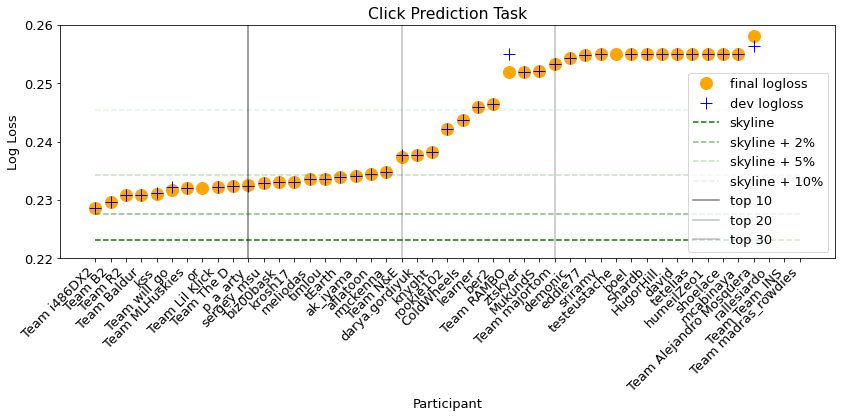

In [29]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

df = df.sort_values(by='click_logloss_final')

ax.plot(df.participant, df.click_logloss_final, ms=12,
        linestyle='None', marker='o', color='orange', label='final logloss')
plt.xticks(rotation=45, ha='right')
ax.plot(df.participant, df.click_logloss_dev, linestyle='None', marker='+', 
        ms=12, color='blue', label='dev logloss')

ax.plot(click_skyline*np.ones(len(df)), 'g--', label='skyline')
ax.plot(1.02*click_skyline*np.ones(len(df)), 'g--', alpha=.5, label='skyline + 2%')
ax.plot(1.05*click_skyline*np.ones(len(df)), 'g--', alpha=.25, label='skyline + 5%')
ax.plot(1.1*click_skyline*np.ones(len(df)), 'g--', alpha=.1, label='skyline + 10%')
#ax.plot(click_baseline*np.ones(len(df)), 'k--', alpha=.5, label='dummy')
ax.axline((10,.220),(10,.260), color='k', alpha=.5, label='top 10')
ax.axline((20,.220),(20,.260), color='k', alpha=.25, label='top 20')
ax.axline((30,.220),(30,.260), color='k', alpha=.25, label='top 30')

ax.set_ylim(.22, .26)
ax.legend(loc='lower right')
plt.xlabel('Participant')
plt.ylabel('Log Loss')
plt.title('Click Prediction Task')
plt.tight_layout()

plt.savefig('click_perf.png')

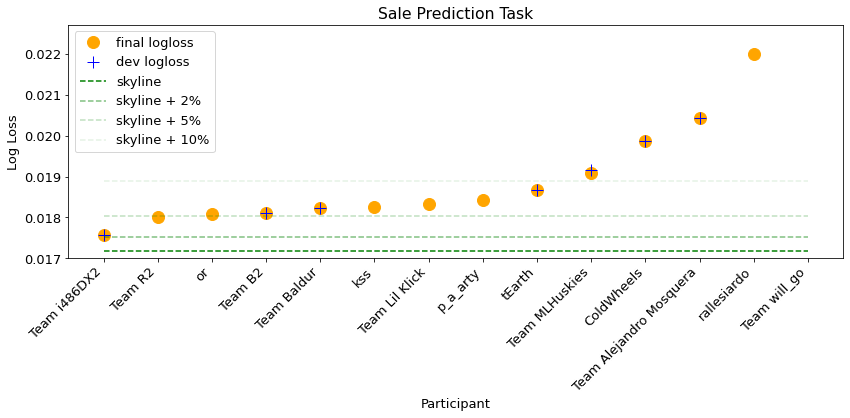

In [8]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

df = df[np.isnan(df.sale_logloss_final) != True].sort_values(by='sale_logloss_final')

ax.plot(df.participant, df.sale_logloss_final, ms=12,
        linestyle='None', marker='o', color='orange', label='final logloss')
plt.xticks(rotation=45, ha='right')
ax.plot(df.participant, df.sale_logloss_dev,  ms=12, linestyle='None', marker='+', 
        color='blue', label='dev logloss')

ax.plot(sale_skyline*np.ones(len(df)), 'g--', label='skyline')
ax.plot(1.02*sale_skyline*np.ones(len(df)), 'g--', alpha=.5, label='skyline + 2%')
ax.plot(1.05*sale_skyline*np.ones(len(df)), 'g--', alpha=.25, label='skyline + 5%')
ax.plot(1.1*sale_skyline*np.ones(len(df)), 'g--', alpha=.1, label='skyline + 10%')
#ax.plot(click_baseline*np.ones(len(df)), 'k--', alpha=.5, label='dummy')

#ax.axline((10,.017),(10,.0227), color='k', alpha=.5, label='top 10')


ax.set_ylim(.017, .0227)
ax.legend(loc='upper left')
plt.xlabel('Participant')
plt.ylabel('Log Loss')
plt.title('Sale Prediction Task')
plt.tight_layout()
plt.savefig('sale_perf.png')

In [9]:
click_dev_rank = df_dev.sort_values(by='click_logloss')[['participant', 'click_logloss']]
click_dev_rank = click_dev_rank.groupby('participant').min().sort_values(by='click_logloss')
click_dev_rank['rank'] = np.arange(1, len(click_dev_rank)+1).astype(int)

In [10]:
click_final_rank = df_final.sort_values(by='click_logloss')[['participant', 'click_logloss']]
click_final_rank = click_final_rank.groupby('participant').min().sort_values(by='click_logloss')
click_final_rank['rank'] = np.arange(1, len(click_final_rank)+1)

In [11]:
click_ranks = click_dev_rank.merge(
    click_final_rank, on='participant', how='outer', suffixes=('_dev', '_final')
).fillna(10000).sort_values(by='rank_final')

In [12]:
click_ranks[:10]

click_logloss_dev  rank_dev  click_logloss_final  rank_final
participant                                                                 
Team i486DX2             0.228707       1.0             0.228707           1
Team B2                  0.229662       2.0             0.229662           2
Team R2                  0.230859       3.0             0.230858           3
Team Baldur              0.230864       4.0             0.230864           4
kss                      0.231125       5.0             0.231040           5
Team will_go             0.232286       8.0             0.231674           6
Team MLHuskies           0.232083       6.0             0.232054           7
or                   10000.000000   10000.0             0.232096           8
Team Lil Klick           0.232249       7.0             0.232206           9
Team The D               0.232393      10.0             0.232393          10

In [13]:
sale_dev_rank = df_dev[df_dev.sale_logloss < 10000].sort_values(by='sale_logloss')[['participant', 'sale_logloss']]
sale_dev_rank = sale_dev_rank.groupby('participant').min().sort_values(by='sale_logloss')
sale_dev_rank['rank'] = np.arange(1, len(sale_dev_rank)+1).astype(int)

sale_final_rank = df_final[df_final.sale_logloss < 10000].sort_values(by='sale_logloss')[['participant', 'sale_logloss']]
sale_final_rank = sale_final_rank.groupby('participant').min().sort_values(by='sale_logloss')
sale_final_rank['rank'] = np.arange(1, len(sale_final_rank)+1)

sale_ranks = sale_dev_rank.merge(
    sale_final_rank, on='participant', how='outer', suffixes=('_dev', '_final')
).fillna(10000).sort_values(by='rank_final')

sale_ranks[:10]

sale_logloss_dev  rank_dev  sale_logloss_final  rank_final
participant                                                               
Team i486DX2            0.017583       1.0            0.017583           1
Team R2                 0.028806       8.0            0.018008           2
or                  10000.000000   10000.0            0.018074           3
Team B2                 0.018119       2.0            0.018119           4
Team Baldur             0.018242       3.0            0.018242           5
kss                 10000.000000   10000.0            0.018253           6
Team Lil Klick      10000.000000   10000.0            0.018322           7
p_a_arty            10000.000000   10000.0            0.018418           8
tEarth                  0.018669       4.0            0.018669           9
Team MLHuskies          0.019147       5.0            0.019096          10

In [14]:
np.corrcoef(click_ranks.click_logloss_dev, click_ranks.click_logloss_final)[0,1]

0.49755877971023416

In [15]:
np.corrcoef(sale_ranks.sale_logloss_dev, sale_ranks.sale_logloss_final)[0,1]

-0.20231272325529437

In [16]:
for participant in df_dev.participant.unique():
    dev_entries = df_dev[df_dev.participant == participant]
    final_entries = df_final[df_final.participant == participant]
    if len(dev_entries[dev_entries.sale_logloss < 10000]):
        print('-'*80)
        print(participant)
        print('-'*80)
        print('DEV')
        print(dev_entries[['click_logloss', 'sale_logloss']].sort_values(by='click_logloss'))
        print('-'*80)
        print('FINAL')
        print(final_entries[['click_logloss', 'sale_logloss']].sort_values(by='click_logloss'))
        print('-'*80)


--------------------------------------------------------------------------------
Team R2
--------------------------------------------------------------------------------
DEV
    click_logloss  sale_logloss
0        0.230859  10000.000000
21       0.231208      0.028806
--------------------------------------------------------------------------------
FINAL
    click_logloss  sale_logloss
6        0.230858      0.018008
37       0.231019  10000.000000
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Team i486DX2
--------------------------------------------------------------------------------
DEV
   click_logloss  sale_logloss
2       0.228707  10000.000000
3       0.228707      0.017583
7       0.228707  10000.000000
--------------------------------------------------------------------------------
FINAL
    click_logloss  sale_logloss
4        0.228707      0.017583
17       0.2

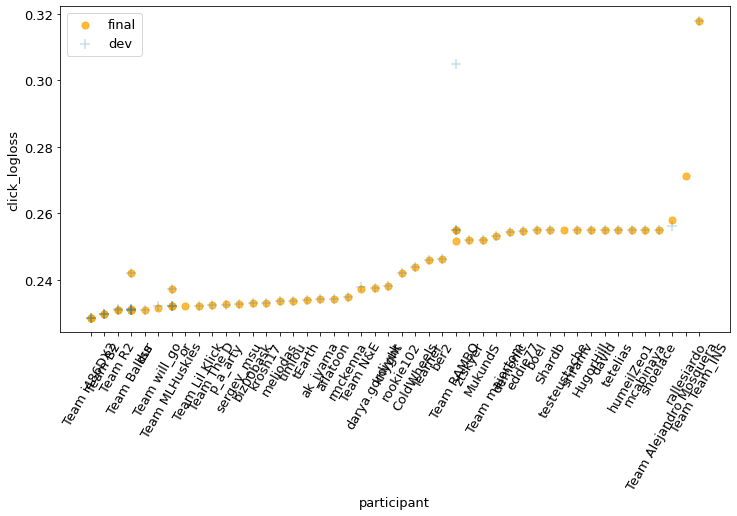

In [17]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
df_final[df_final.click_logloss < .32].sort_values(by='click_logloss').plot(
    kind='scatter', x='participant', y='click_logloss', rot=60, ax=ax, color='orange', s=50, alpha=.75, label='final'
)
df_dev[df_dev.click_logloss < .32].sort_values(by='click_logloss').plot(
    kind='scatter', x='participant', y='click_logloss', rot=60, ax=ax, s=100, alpha=.25, label='dev', marker='+'
)
ax.legend(loc='best')

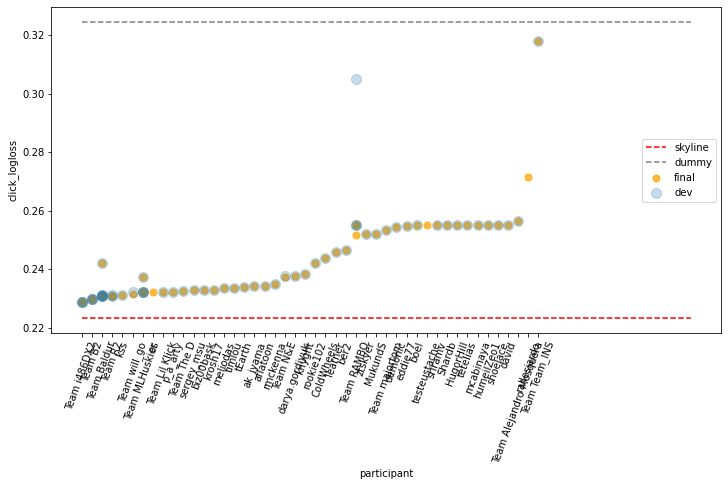

In [18]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
df_final.sort_values(by='click_logloss').plot(
    kind='scatter', x='participant', y='click_logloss', rot=70, ax=ax, color='orange', s=50, alpha=.75, label='final'
)
df_dev.sort_values(by='click_logloss').plot(
    kind='scatter', x='participant', y='click_logloss', rot=70, ax=ax, s=100, alpha=.25, label='dev'
)
ax.plot(click_skyline*np.ones(len(df_final)), 'r--', label='skyline')
ax.plot(click_baseline*np.ones(len(df_final)), 'k--', alpha=.5, label='dummy')
ax.legend(loc='best')

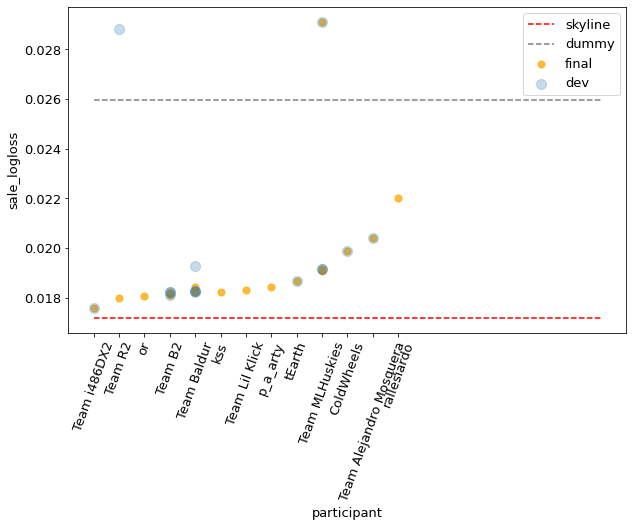

In [21]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
df_final[df_final.sale_logloss < .03].sort_values(by='sale_logloss').plot(
    kind='scatter', x='participant', y='sale_logloss', rot=70, ax=ax, color='orange', s=50, alpha=.75, label='final'
)
df_dev[df_dev.sale_logloss < .03].sort_values(by='sale_logloss').plot(
    kind='scatter', x='participant', y='sale_logloss', rot=70, ax=ax, s=100, alpha=.25, label='dev'
)
ax.plot(sale_skyline*np.ones(len(df_final[df_final.sale_logloss < .03])), 'r--', label='skyline')
ax.plot(sale_baseline*np.ones(len(df_final[df_final.sale_logloss < .03])), 'k--', alpha=.5, label='dummy')
ax.legend(loc='best')